# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + cities[i]).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio grande
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | sarai naurang
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | najran
Processing Record 17 of Set 1 | nsanje
Processing Record 18 of Set 1 | portoferraio
Processing Record 19 of Set 1 | skibbereen
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | saleaula
C

Processing Record 39 of Set 4 | paita
Processing Record 40 of Set 4 | udachnyy
Processing Record 41 of Set 4 | nara
Processing Record 42 of Set 4 | sambava
Processing Record 43 of Set 4 | great bend
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | altamira
Processing Record 48 of Set 4 | solnechnyy
Processing Record 49 of Set 4 | along
Processing Record 0 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 5 | pousat
City not found. Skipping...
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | rundu
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | black river
Processing Record 9 of Se

Processing Record 27 of Set 8 | pudozh
Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | arvika
Processing Record 30 of Set 8 | pedasi
Processing Record 31 of Set 8 | copiapo
Processing Record 32 of Set 8 | silvan
Processing Record 33 of Set 8 | millerovo
Processing Record 34 of Set 8 | yatou
Processing Record 35 of Set 8 | anjiang
Processing Record 36 of Set 8 | quang ngai
Processing Record 37 of Set 8 | la romana
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | tautira
Processing Record 40 of Set 8 | bajram curri
Processing Record 41 of Set 8 | dzhebariki-khaya
Processing Record 42 of Set 8 | duayaw nkwanta
Processing Record 43 of Set 8 | mandiana
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | hami
Processing Record 46 of Set 8 | teknaf
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 49 of Set 8 | namibe
Processing Record 0 of

Processing Record 18 of Set 12 | balkhash
Processing Record 19 of Set 12 | lithakia
Processing Record 20 of Set 12 | ornskoldsvik
Processing Record 21 of Set 12 | kiunga
Processing Record 22 of Set 12 | sirjan
Processing Record 23 of Set 12 | warrnambool
Processing Record 24 of Set 12 | ugoofaaru
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | malwan
City not found. Skipping...
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | ciras
City not found. Skipping...
Processing Record 29 of Set 12 | jaisinghnagar
Processing Record 30 of Set 12 | viedma
Processing Record 31 of Set 12 | bowen
Processing Record 32 of Set 12 | puerto del rosario
Processing Record 33 of Set 12 | placido de castro
Processing Record 34 of Set 12 | gazimurskiy zavod
Processing Record 35 of Set 12 | siniscola
Processing Record 36 of Set 12 | yialos
City not found. Skipping...
Processing Record 37 of Set 12 | barra do garcas
Processing Record 38 of Set 12 | haines junction
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
 
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio grande,-32.0350,-52.0986,16.55,65,10,4.66,BR,1681441105
1,qaanaaq,77.4840,-69.3632,-15.38,75,3,2.68,GL,1681441106
2,sarai naurang,32.8259,70.7814,29.72,23,0,0.72,PK,1681441106
3,tuatapere,-46.1333,167.6833,17.97,60,0,1.74,NZ,1681441106
4,albany,42.6001,-73.9662,20.23,56,7,2.04,US,1681440917


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,16.55,65,10,4.66,BR,1681441105
1,qaanaaq,77.4840,-69.3632,-15.38,75,3,2.68,GL,1681441106
2,sarai naurang,32.8259,70.7814,29.72,23,0,0.72,PK,1681441106
3,tuatapere,-46.1333,167.6833,17.97,60,0,1.74,NZ,1681441106
4,albany,42.6001,-73.9662,20.23,56,7,2.04,US,1681440917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

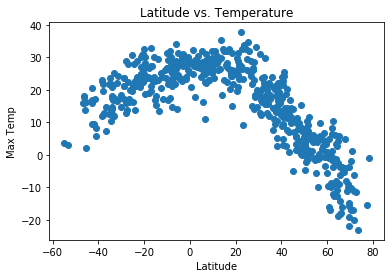

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values1 = city_data_df['Lat']
y_values1 = city_data_df['Max Temp']
plt.scatter(x_values1, y_values1)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

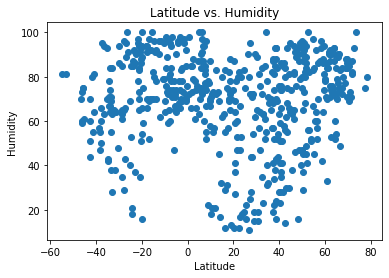

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values2= city_data_df['Lat']
y_values2 = city_data_df['Humidity']
plt.scatter(x_values2, y_values2)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

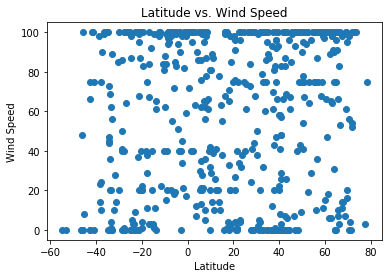

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values3= city_data_df['Lat']
y_values3 = city_data_df['Cloudiness']
plt.scatter(x_values3, y_values3)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

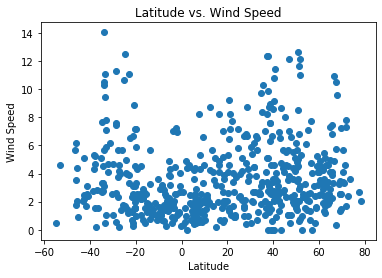

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values4= city_data_df['Lat']
y_values4 = city_data_df['Wind Speed']
plt.scatter(x_values4, y_values4)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern=city_data_df.loc[city_data_df["Lat"]>=0]
northern_df = pd.DataFrame(northern)
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaanaaq,77.4840,-69.3632,-15.38,75,3,2.68,GL,1681441106
2,sarai naurang,32.8259,70.7814,29.72,23,0,0.72,PK,1681441106
4,albany,42.6001,-73.9662,20.23,56,7,2.04,US,1681440917
5,cherskiy,68.7500,161.3000,-11.03,77,7,3.29,RU,1681441107
6,kahului,20.8947,-156.4700,29.01,59,20,9.26,US,1681440976


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern=city_data_df.loc[city_data_df["Lat"]<0]
southern_df = pd.DataFrame(southern)
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,16.55,65,10,4.66,BR,1681441105
3,tuatapere,-46.1333,167.6833,17.97,60,0,1.74,NZ,1681441106
8,rikitea,-23.1203,-134.9692,23.30,86,100,11.08,PF,1681440906
9,ushuaia,-54.8000,-68.3000,3.81,81,0,0.51,AR,1681441108
10,vaini,-21.2000,-175.2000,30.09,70,20,6.69,TO,1681441109


###  Temperature vs. Latitude Linear Regression Plot

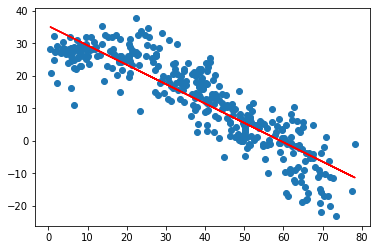

In [26]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_df['Lat']
y_values=northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")



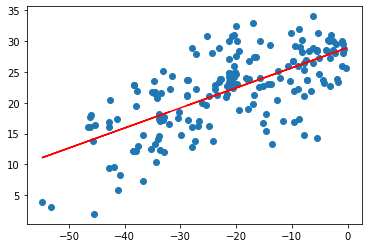

In [27]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_df['Lat']
y_values=southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

**Discussion about the linear relationship:** Based off of the linear regression line of both the southern and northern hempisphere graphs, there seems to be a pretty strong correlation between the max temperature and the latitude location. In the Northern Hempisphere the further east you go, the max temp gets colder, and vise versa. In the southern hemisphere, the further west you go the temperature gets colder.

### Humidity vs. Latitude Linear Regression Plot

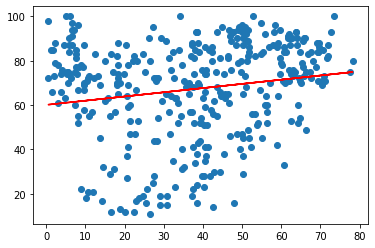

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_df['Lat']
y_values=northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

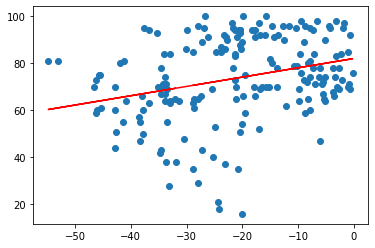

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_df['Lat']
y_values=southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

**Discussion about the linear relationship:** Based off of the linear regression lines of both the southern and northern hemisphere, there is not a strong correlation between latitude location and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

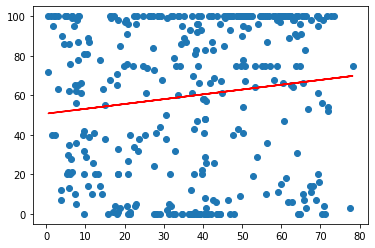

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_df['Lat']
y_values=northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

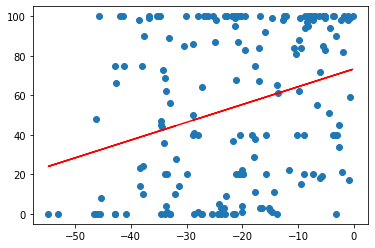

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_df['Lat']
y_values=southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

**Discussion about the linear relationship:** Based off of the linear regression lines of both the southern and northern hemisphere, there is not a strong correlation between latitude location and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

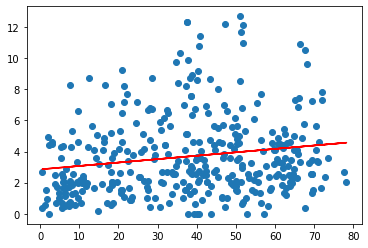

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_df['Lat']
y_values=northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

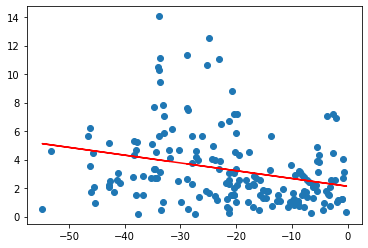

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_df['Lat']
y_values=southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

**Discussion about the linear relationship:** Based off of the linear regression lines of both the southern and northern hemisphere, there is a very weak correlation between latitude location and Wind Speed. There is slight correlation, but not very strong. 